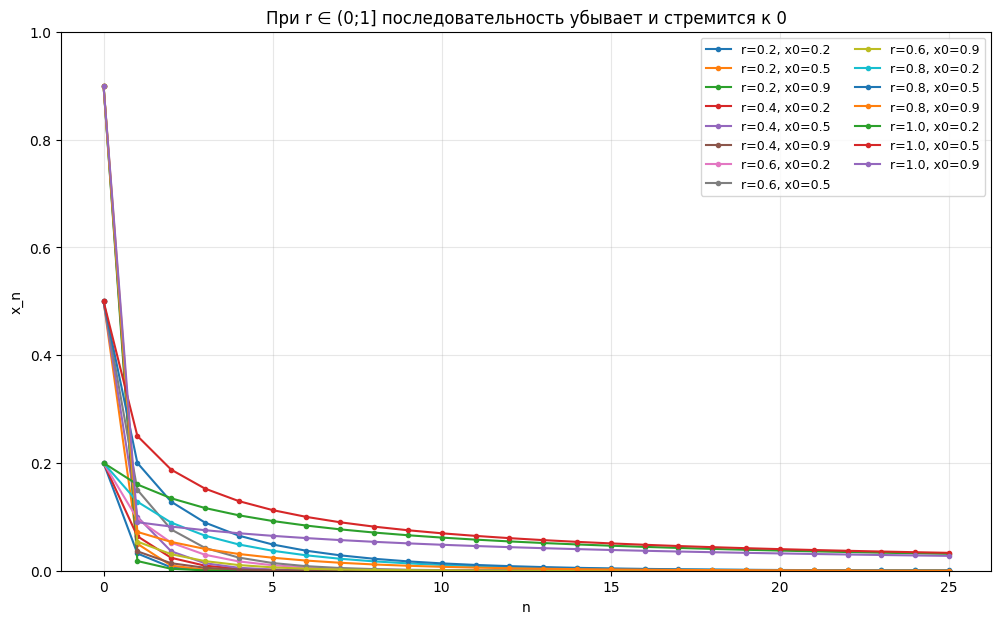

In [7]:
""" Задание №2 (Normal)
    Построение графика
"""

import numpy as np
import matplotlib.pyplot as plt

# Функция отображения
def f(x, r):
    return r * x * (1 - x)

def generate_sequence(r, x0, n_iter=30):
    """Возвращает последовательность длины n+1"""
    sequence = [x0]
    x = x0
    for _ in range(n_iter):
        x = f(x, r)
        sequence.append(x)
    return sequence

r_values = [0.2, 0.4, 0.6, 0.8, 1.0]
x0_values = [0.2, 0.5, 0.9]

plt.figure(figsize=(12, 7))

for r in r_values:
    for x0 in x0_values:
        seq = generate_sequence(r, x0, n_iter=25)
        plt.plot(seq, marker='o', markersize=3, label=f"r={r}, x0={x0}")

plt.xlabel("n")
plt.ylabel("x_n")
plt.title("При r ∈ (0;1] последовательность убывает и стремится к 0")
plt.grid(alpha=0.3)

plt.legend(ncol=2, fontsize=9)
plt.ylim(0, 1)
plt.show()


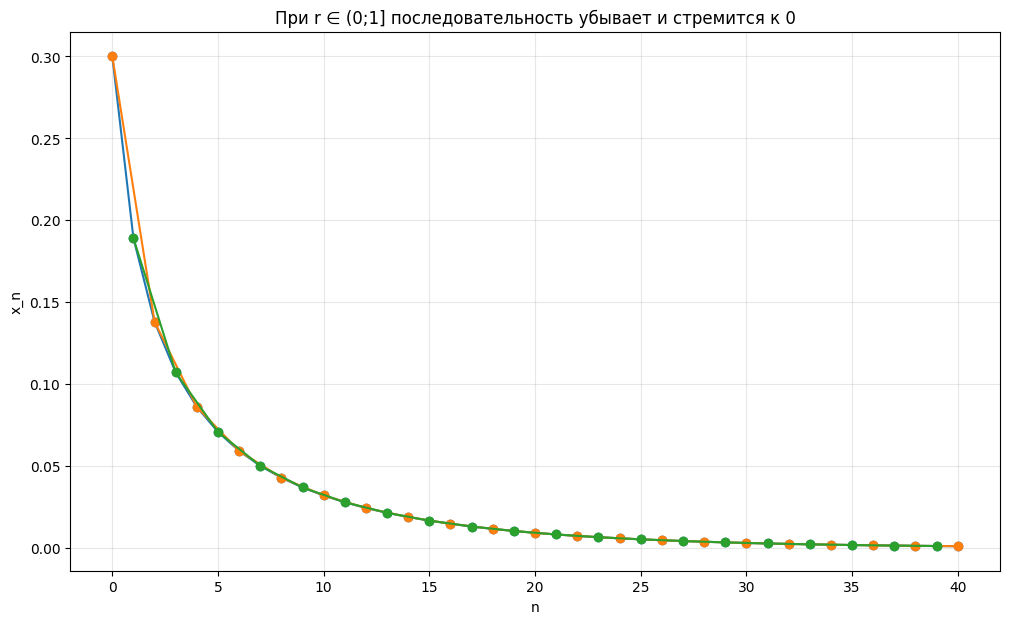

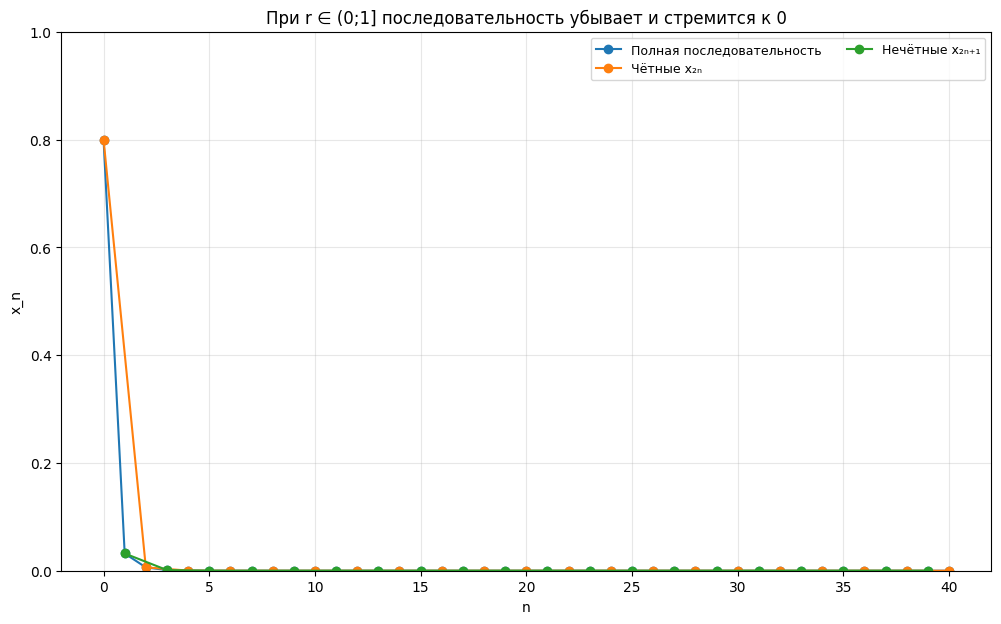

In [14]:
""" Задание №3 (Normal)
    Построение графиков.
"""

import numpy as np
import matplotlib.pyplot as plt

# Функция отображения
def f(x, r):
    return r * x * (1 - x)

def generate_sequence(r, x0, n_iter=30):
    """Возвращает последовательность длины n+1"""
    sequence = [x0]
    x = x0
    for _ in range(n_iter):
        x = f(x, r)
        sequence.append(x)
    return sequence

# для разных r и х показываем, что стремление к 0.

# График 1
r = 0.9
x0 = 0.3
n_iter = 40

seq = generate_sequence(r, x0, n_iter)

plt.figure(figsize=(12, 7))

even_seq = seq[0::2] # четные индексф
odd_seq  = seq[1::2] # нечетные индексы

# номер шагов
n_even = np.arange(len(even_seq))
n_odd  = np.arange(len(odd_seq))

plt.plot(seq, marker='o', label='Полная последовательность')
plt.plot(n_even*2, even_seq, 'o-', label='Чётные x₂ₙ')
plt.plot(n_odd*2+1, odd_seq, 'o-', label='Нечётные x₂ₙ₊₁')

plt.xlabel("n")
plt.ylabel("x_n")
plt.title("При r ∈ (0;1] последовательность убывает и стремится к 0")
plt.grid(alpha=0.3)

# График 2
r = 0.2
x0 = 0.8
n_iter = 40

seq = generate_sequence(r, x0, n_iter)

plt.figure(figsize=(12, 7))

even_seq = seq[0::2] # четные индексф
odd_seq  = seq[1::2] # нечетные индексы

# номер шагов
n_even = np.arange(len(even_seq))
n_odd  = np.arange(len(odd_seq))

plt.plot(seq, marker='o', label='Полная последовательность')
plt.plot(n_even*2, even_seq, 'o-', label='Чётные x₂ₙ')
plt.plot(n_odd*2+1, odd_seq, 'o-', label='Нечётные x₂ₙ₊₁')

plt.xlabel("n")
plt.ylabel("x_n")
plt.title("При r ∈ (0;1] последовательность убывает и стремится к 0")
plt.grid(alpha=0.3)

plt.legend(ncol=2, fontsize=9)
plt.ylim(0, 1)
plt.show()



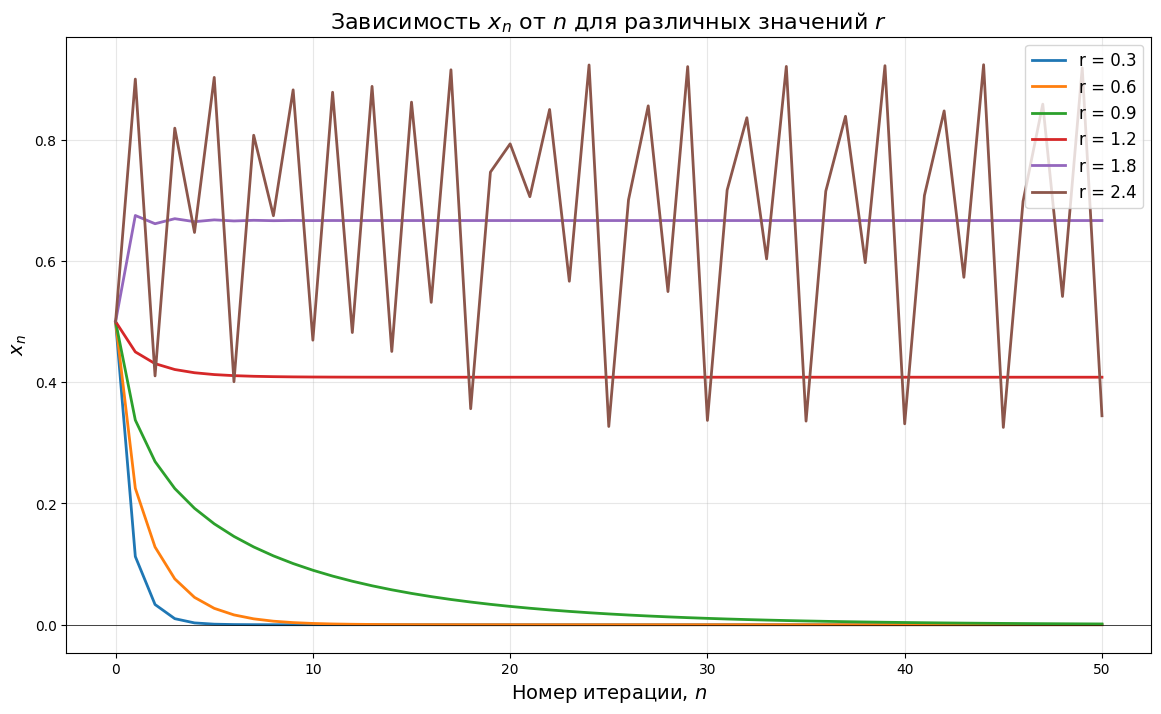

In [40]:
""" Задание №4 (Normal)
    Построение графика зависимости x_n от n для различных значений r.
"""

import numpy as np
import matplotlib.pyplot as plt

# Функция отображения
def g(x, r):
    return r * x * (1 - x**2)

def generate_sequence(r, x0=0.5, n_iter=50):
    """Возвращает последовательность длины n+1"""
    sequence = [x0]
    x = x0
    for _ in range(n_iter):
        x = g(x, r)
        sequence.append(x)
    return sequence

r_values = [0.3, 0.6, 0.9, 1.2, 1.8, 2.4]
x0 = 0.5
n_iter = 50

# Построение графиков
plt.figure(figsize=(14, 8))

for r in r_values:
    seq = generate_sequence(r, x0, n_iter)
    plt.plot(range(n + 1), seq, label=f'r = {r}', linewidth=2)

# Настройка графика
plt.xlabel('Номер итерации, $n$', fontsize=14)
plt.ylabel('$x_n$', fontsize=14)
plt.title('Зависимость $x_n$ от $n$ для различных значений $r$', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

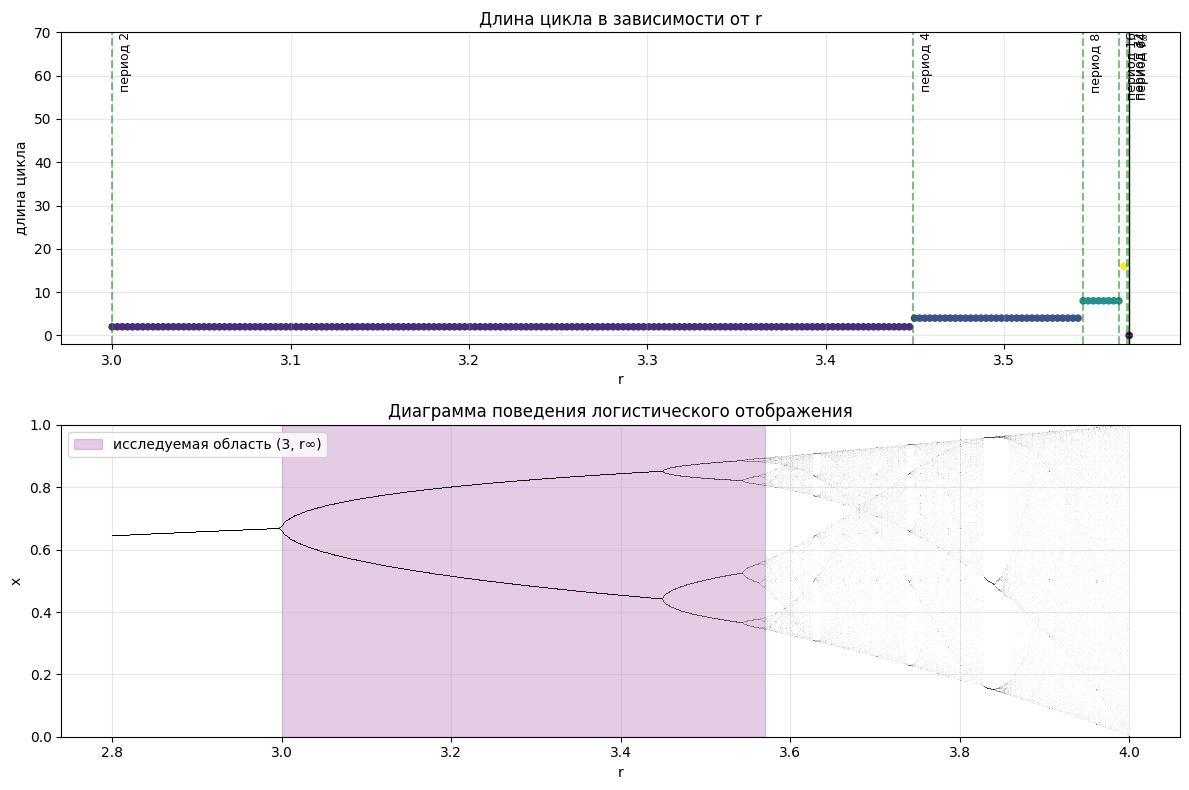

In [15]:
""" Задание №1 (Hard)
    Функции для анализа длины циклов и построение графиков.
"""
import numpy as np
import matplotlib.pyplot as plt

def generate_sequence(r, x0, n):
    """Возвращает последовательность длины n+1"""
    x = x0
    seq = []
    for _ in range(n):
        x = r * x * (1 - x)
        seq.append(x)
    return seq

def find_period(seq, tolerance=1e-3, max_period=64):
    """Определяет длину цикла (возвращает 0, если нет)"""
    N = len(seq)

    for p in range(1, max_period + 1):
        ok = True
        # сравниваем только последние 100 значений
        for i in range(1, 50):
            if abs(seq[-i] - seq[-i - p]) > tolerance:
                ok = False
                break
        if ok:
            return p

    return 0

r_values = np.linspace(3.0, 3.57, 200)
periods = []

for r in r_values:
    seq = generate_sequence(r, 0.5, 1500)
    stable_part = seq[500:] # убираем первые неинтересные значения
    period = find_period(stable_part)
    periods.append(period)


# График 1: длина цикла в зависимости от r
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.scatter(r_values, periods, c=periods, cmap='viridis', s=20)

# Известные значения r, где меняется длина
points_r = [3.000071, 3.448931, 3.543919, 3.564371, 3.568789, 3.569715]
labels =   ['2', '4', '8', '16', '32', '64']

for r_val, lab in zip(points_r, labels):
    plt.axvline(r_val, color='green', linestyle='--', alpha=0.5)
    plt.text(r_val + 0.004, 70, f'период {lab}',
             rotation=90, va='top', fontsize=9)

plt.axvline(3.5699456, color='black', linewidth=1)
plt.text(3.5699456 + 0.004, 70, r'$r_\infty$',
         rotation=90, va='top', fontsize=10)

plt.title('Длина цикла в зависимости от r')
plt.xlabel('r')
plt.ylabel('длина цикла')
plt.grid(alpha=0.3)
plt.ylim(-2, 70)


# График 2: диаграмма поведения отображения
plt.subplot(2, 1, 2)
r_dense = np.linspace(2.8, 4.0, 1200)
x = np.ones_like(r_dense) * 0.5

# Неинтересные значения
for _ in range(800):
    x = r_dense * x * (1 - x)

# Интересные последние значения
for _ in range(100):
    x = r_dense * x * (1 - x)
    plt.plot(r_dense, x, ',k', alpha=0.03)

# Выделение интересующей области
plt.axvspan(3.0, 3.5699456, color='purple', alpha=0.2,
            label='исследуемая область (3, r∞)')

plt.title('Диаграмма поведения логистического отображения')
plt.xlabel('r')
plt.ylabel('x')
plt.grid(alpha=0.3)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
""""Дополнительная функция к заданию 1 (Hard)"""

def finder():
    """Поиск значений r, при которых меняется длина цикла."""

    r_values = np.linspace(3.0, 3.57, 8000)
    prev_period = 1
    points = [3.0]

    for r in r_values:
        if r <= 3.0:
            continue

        # Начальные значения, которые нам не интересны
        x = 0.5
        for _ in range(1500):
            x = r * x * (1 - x)

        # Значения, которые мы будем анализировать
        values = []
        for _ in range(200):
            x = r * x * (1 - x)
            values.append(x)

        # Проверяем возможные длины цикла
        period = 0
        for p in [1, 2, 4, 8, 16, 32, 64]:
            ok = True
            for i in range(10):
                if abs(values[-1 - i] - values[-1 - i - p]) > 0.001:
                    ok = False
                    break
            if ok:
                period = p
                break

        # Если длина цикла изменилась, то фиксируем точку
        if period > 0 and period != prev_period:
            print(f"r ≈ {r:.6f}: период {prev_period} → {period}")
            points.append(r)
            prev_period = period

    return points

found = finder()


r ≈ 3.000071: период 1 → 2
r ≈ 3.448931: период 2 → 4
r ≈ 3.543919: период 4 → 8
r ≈ 3.564371: период 8 → 16
r ≈ 3.568789: период 16 → 32
r ≈ 3.569715: период 32 → 64
r ≈ 3.570000: период 64 → 32


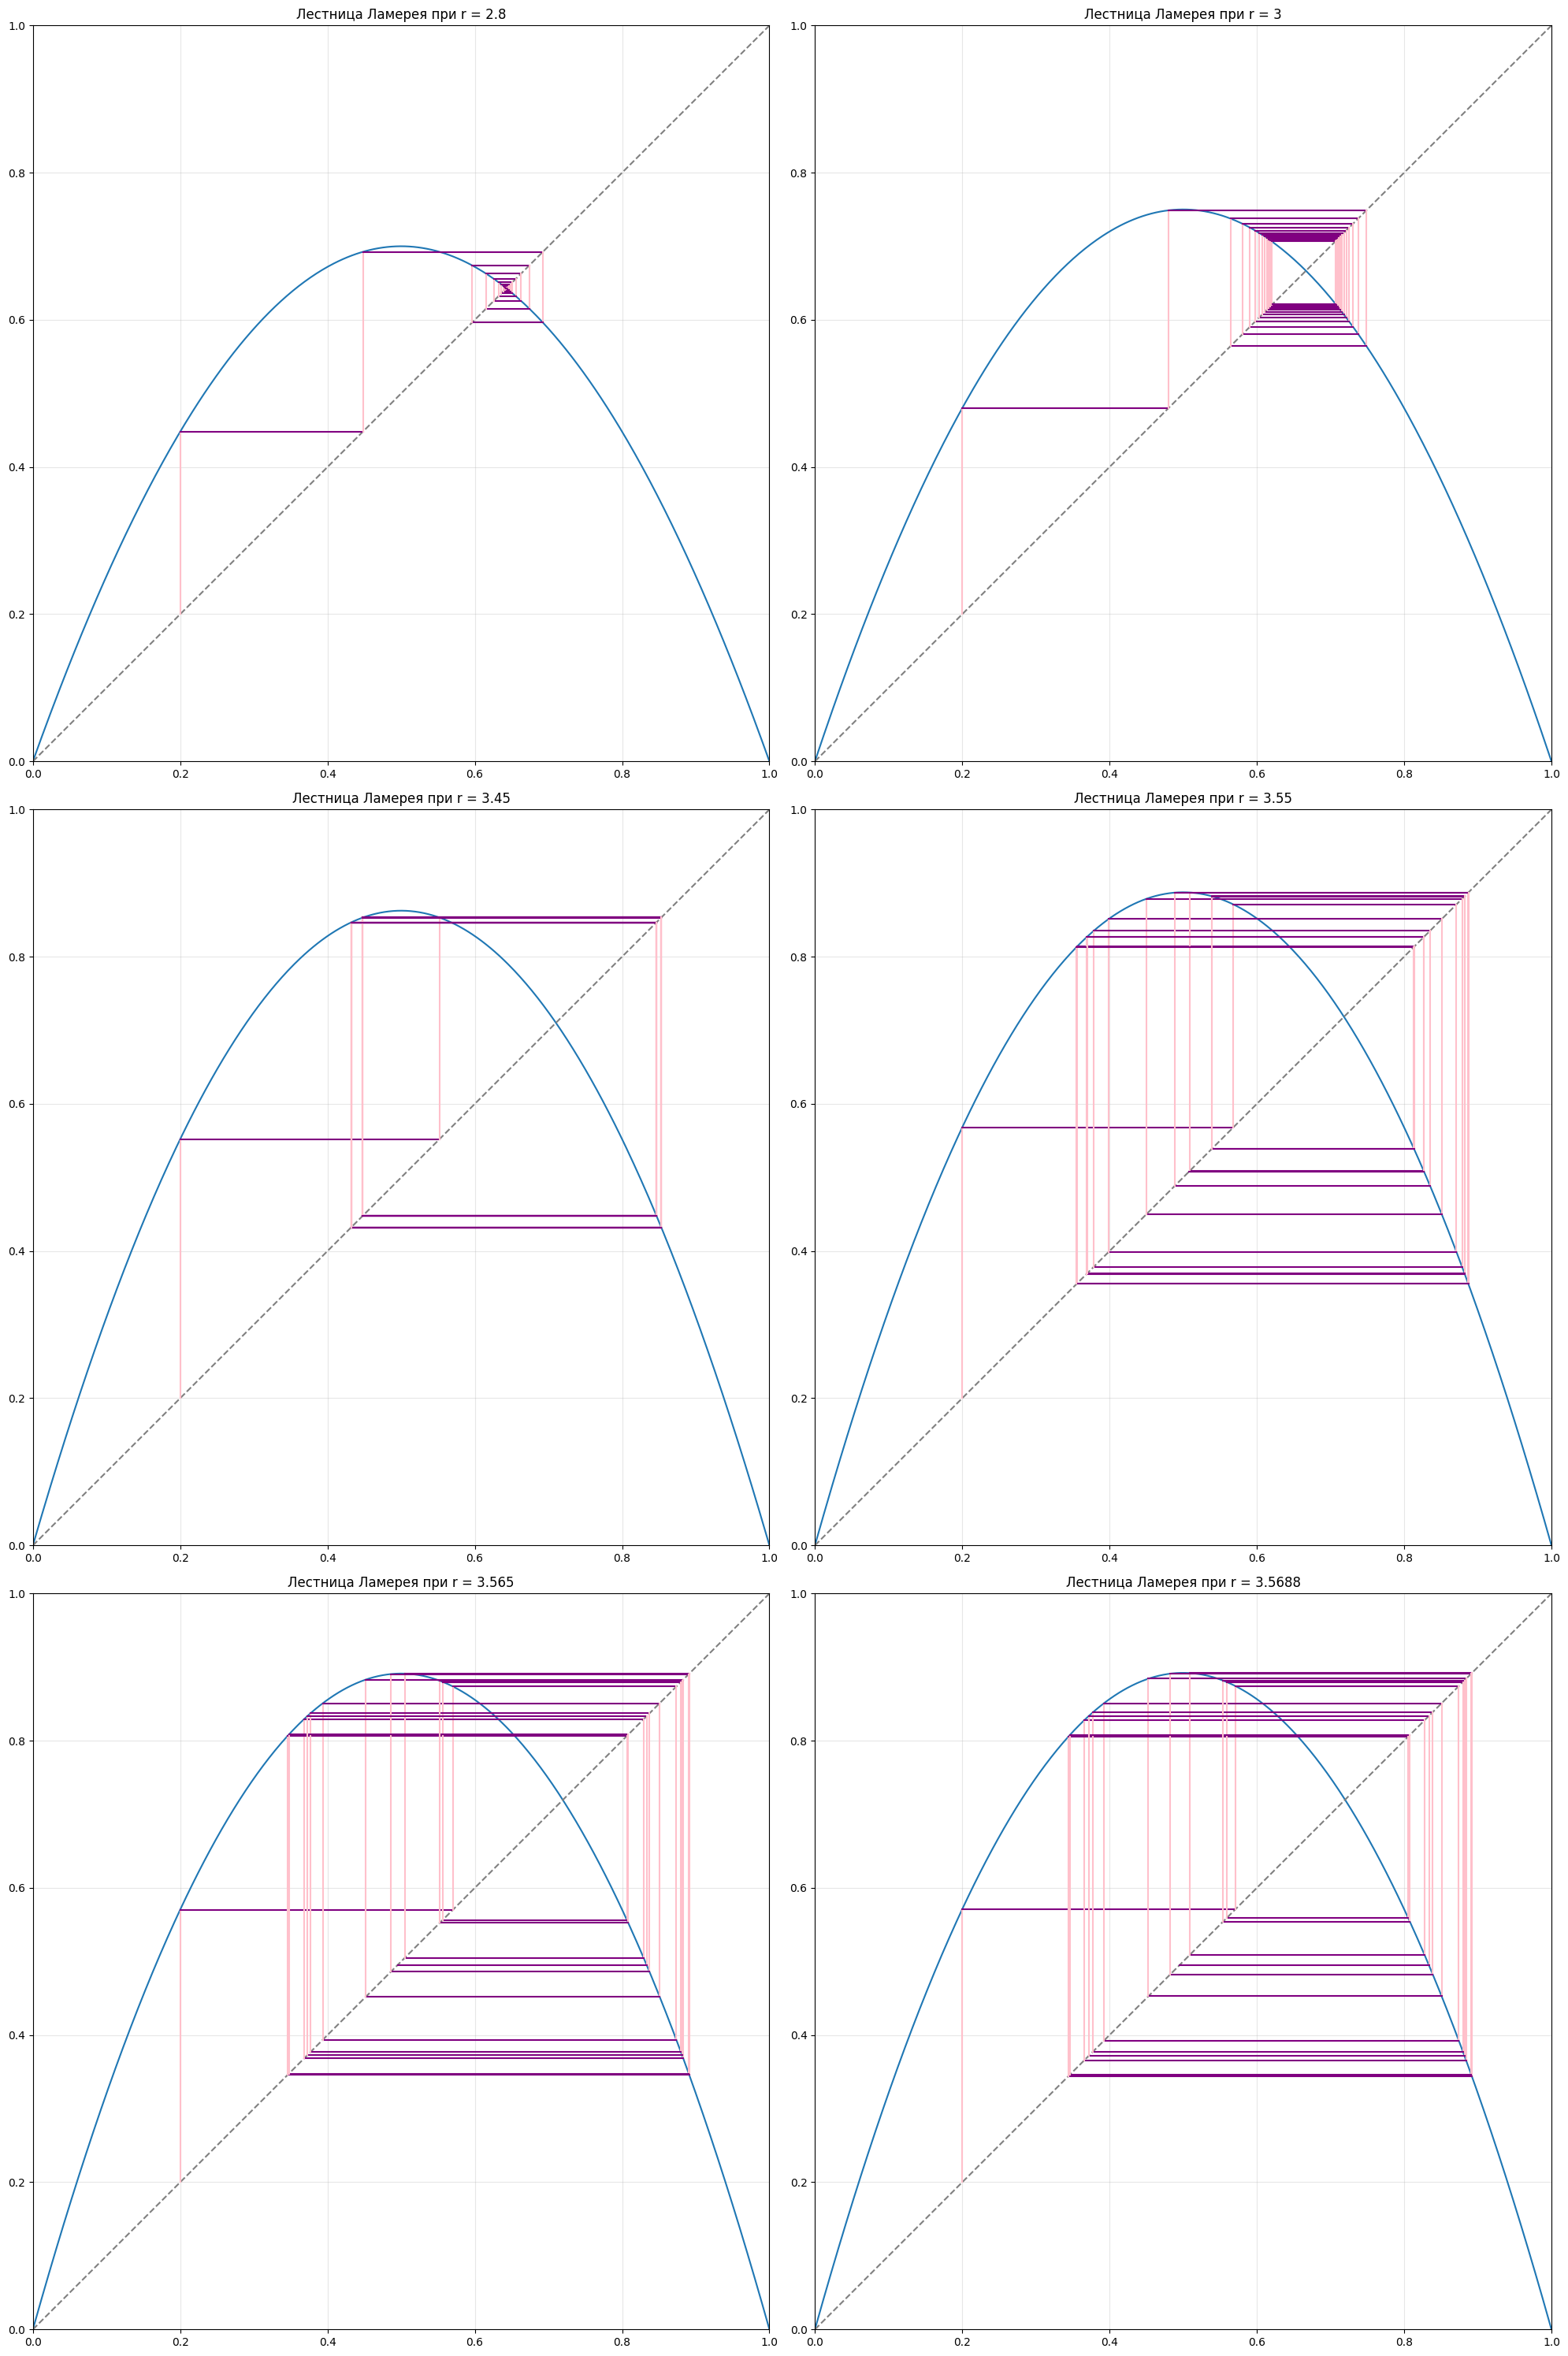

In [31]:
""" Задание №2 (Hard)
    Функция построения лестницы Ламерея и построение графиков.
"""
import numpy as np
import matplotlib.pyplot as plt

# Функция логистического отображения
def f(x, r):
    return r * x * (1 - x)

# Лестница Ламерея
def lamerey(ax, r, x0=0.2):
    xs = np.linspace(0, 1, 500)

    # график функции и диагональ
    ax.plot(xs, f(xs, r), label=f"f(x), r={r}")
    ax.plot(xs, xs, '--', color='gray')

    x = x0
    for _ in range(25):
        y = f(x, r)

        # вертикальная линия (от x к f(x))
        ax.plot([x, x], [x, y], color='pink')

        # горизонтальная линия (от f(x) к точке на диагонали)
        ax.plot([x, y], [y, y], color='purple')

        x = y

    ax.set_title(f"Лестница Ламерея при r = {r}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.3)


# Построение графиков с циклами определенной длины:

r_values = [2.8, 3, 3.45, 3.55, 3.565, 3.5688, 3.5698]

fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten()

for ax, r in zip(axes, r_values):
    lamerey(ax, r)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2164372387.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return r * x * (1 - x**2)
/tmp/ipython-input-2164372387.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(seq[-i] - seq[-i - p]) > tolerance:
/tmp/ipython-input-2164372387.py:9: RuntimeWarning: overflow encountered in scalar power
  return r * x * (1 - x**2)


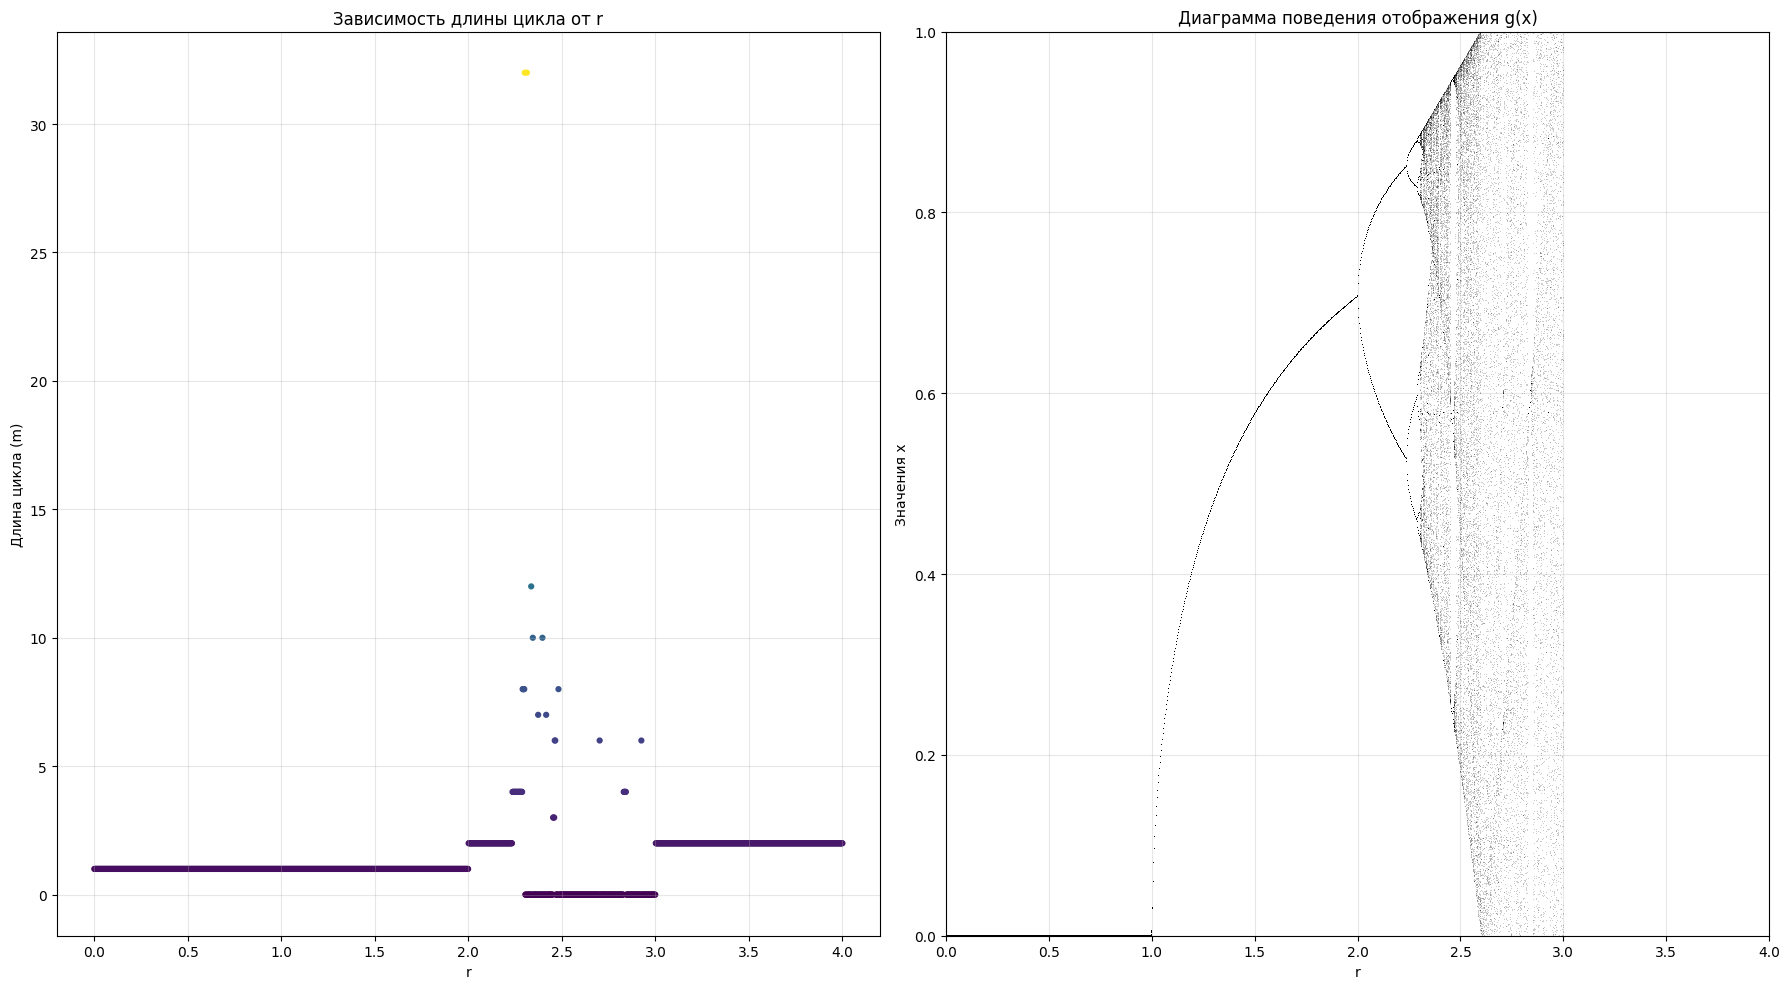

In [66]:
""" Задание №3 (Hard)
    Исследование длины цикла отображения g(x) при разных r.
"""

import numpy as np
import matplotlib.pyplot as plt

def g(x, r):
    return r * x * (1 - x**2)

def generate_sequence(r, x0=0.2, n_iter=50):
    """Генерирует последовательность длины n+1"""
    x = x0
    seq = []
    for _ in range(n_iter):
        x = g(x, r)
        seq.append(x)
    return seq

def find_period(seq, tolerance=1e-3, max_period=64):
    """Определяет длину цикла (возвращает 0, если нет)"""
    N = len(seq)
    for p in range(1, max_period + 1):
        ok = True
        # сравниваем только последние 100 значений
        for i in range(1, 50):
            if abs(seq[-i] - seq[-i - p]) > tolerance:
                ok = False
                break
        if ok:
            return p
    return 0


r_values = np.linspace(0, 4, 1400)
periods = []

r_plot = []
x_plot = []

for r in r_values:
    seq = generate_sequence(r, x0=0.2, n_iter=1200)
    tail = seq[-200:] # смотрим только интересующие значения
    period = find_period(tail)
    periods.append(period)

    # добавляем точки для диаграммы
    r_plot.extend([r] * len(tail))
    x_plot.extend(tail)


periods = np.array(periods)
r_plot = np.array(r_plot)
x_plot = np.array(x_plot)


plt.figure(figsize=(18, 10))

# График 1: длина цикла в зависимости от r
plt.subplot(1, 2, 1)
plt.scatter(r_values, periods, c=periods, cmap='viridis', s=12)
plt.xlabel("r")
plt.ylabel("Длина цикла (m)")
plt.title("Зависимость длины цикла от r")
plt.grid(alpha=0.3)


# График 2: поведение последовательности при разных r
plt.subplot(1, 2, 2)
plt.plot(r_plot, x_plot, ',k', alpha=0.2)
plt.xlabel("r")
plt.ylabel("Значения x")
plt.title("Диаграмма поведения отображения g(x)")
plt.grid(alpha=0.3)

plt.xlim(0, 4)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


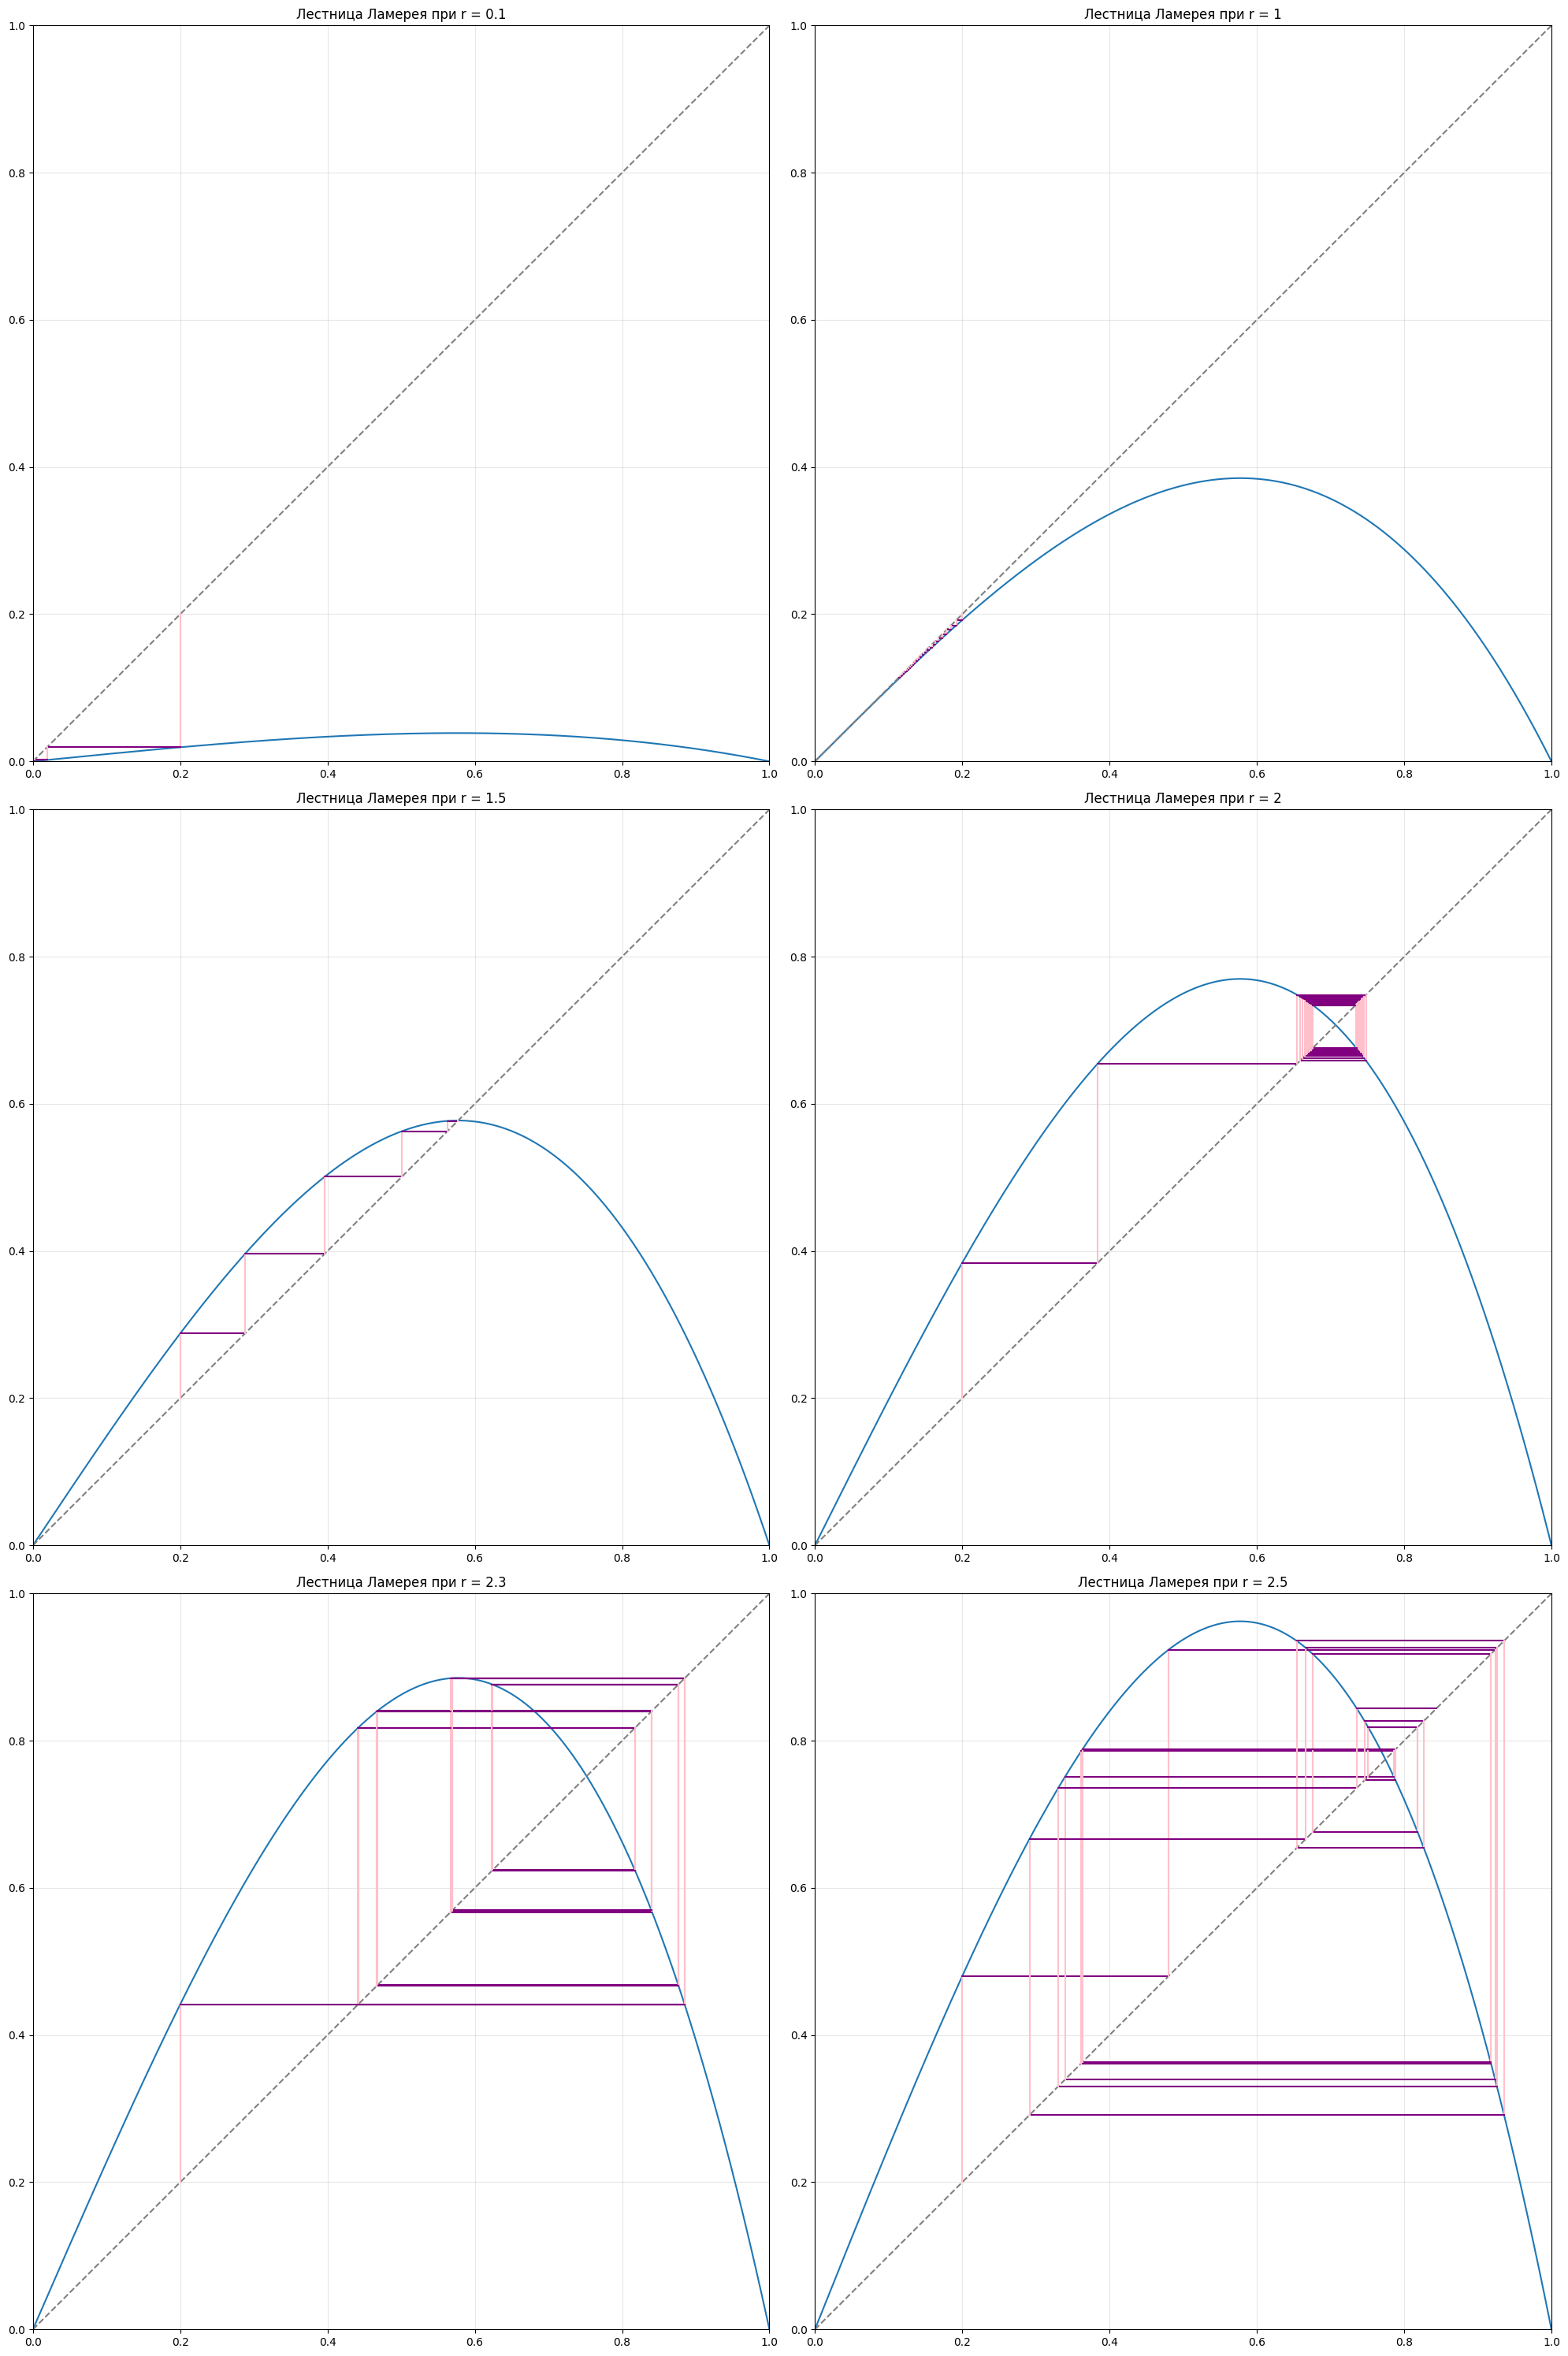

In [4]:
""" Задание №3 (Hard)
    Функция построения лестницы Ламерея и построение графиков.
"""
import numpy as np
import matplotlib.pyplot as plt

# Функция логистического отображения
def f(x, r):
    return r * x * (1 - x**2)

# Лестница Ламерея
def lamerey(ax, r, x0=0.2):
    xs = np.linspace(0, 1, 500)

    # график функции и диагональ
    ax.plot(xs, f(xs, r), label=f"f(x), r={r}")
    ax.plot(xs, xs, '--', color='gray')

    x = x0
    for _ in range(25):
        y = f(x, r)

        # вертикальная линия (от x к f(x))
        ax.plot([x, x], [x, y], color='pink')

        # горизонтальная линия (от f(x) к точке на диагонали)
        ax.plot([x, y], [y, y], color='purple')

        x = y

    ax.set_title(f"Лестница Ламерея при r = {r}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.3)


# Построение графиков с циклами определенной длины:

r_values = [0.1, 1, 1.5, 2, 2.3, 2.5]

fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten()

for ax, r in zip(axes, r_values):
    lamerey(ax, r)

plt.tight_layout()
plt.show()
